## **LinearRegression**




In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [5]:
# y = (1* X1)+ (2 * X2) + 3     <- 공식을 만듦   
X = np.array([[1,1],[1,2],[2,2],[2,3]])
y = np.dot(X, np.array([1,2])) + 3

In [7]:
print(X)
print(y)

[[1 1]
 [1 2]
 [2 2]
 [2 3]]
[ 6  8  9 11]


In [8]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# 기울기
reg.coef_

array([1., 2.])

In [12]:
# 절편
reg.intercept_

3.0000000000000018

In [13]:
# y = (1* X1)+ (2 * X2) + 3     <- 공식을 만듦 
predict_value = np.array([[3,5]])
reg.predict(predict_value)

array([16.])

**Weight-height data**

1.   kaggle -  Weight height data.csv
2.   



In [16]:

from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 

In [17]:
# 구글 드라이브에서 파일 가져오기 - 1
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# 구글 드라이브에서 파일 가져오기 - 2
filename = "/content/weight-height.csv"
# dataFrame
df = pd.read_csv(filename)
df.head(5)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [20]:
df.values

array([['Male', 73.847017017515, 241.893563180437],
       ['Male', 68.78190404589029, 162.3104725213],
       ['Male', 74.11010539178491, 212.7408555565],
       ...,
       ['Female', 63.8679922137577, 128.475318784122],
       ['Female', 69.03424313073461, 163.852461346571],
       ['Female', 61.944245879517204, 113.64910267531201]], dtype=object)

In [21]:
df.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [22]:
df.iloc()

In [23]:
df.loc

In [26]:
# shape
df.shape

(10000, 3)

In [28]:
# count
df.count()

Gender    10000
Height    10000
Weight    10000
dtype: int64

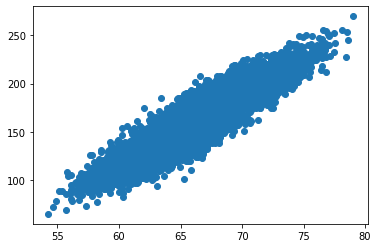

In [32]:
# make x_axis 'Height'
X = df['Height']

# make y_axis  'Weight'
y = df['Weight']

# plot() - X, y, 'o'
plt.plot(X,y,'o')

# Show()
plt.show()

In [33]:
# X 1차원 -> 2차원으로 변경 
X2 = X.values.reshape(-1,1)
#print(X2)

# model
line_fitter = LinearRegression()

# reshape 한 값 바로 사용 
#line_fitter.fit(X.values.reshape(-1,1))

line_fitter.fit(X2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
# 예측 (키 -> 몸무게)
line_fitter.predict([[70]])
line_fitter.predict([[90]])

array([343.81869586])

In [38]:
# 기울기
line_fitter.coef_
# 절편 
line_fitter.intercept_

-350.737191812137

[219.16147993 180.07254619 221.19180859 ... 142.15047514 182.01991949
 127.30437133]


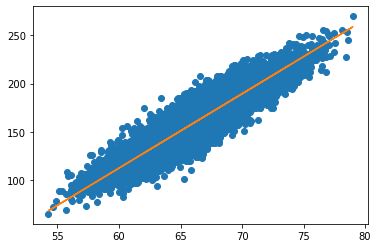

In [42]:
#plot x, y , "o"
plt.plot(X, y, 'o')

# X에 해당되는 예측된 y값 
predict_result_y = line_fitter.predict(X2)
print(predict_result_y)

#draw line
plt.plot(X, predict_result_y)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

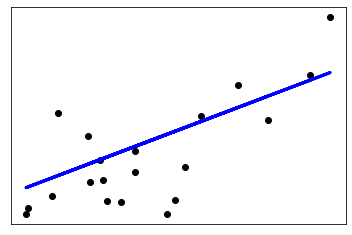

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

print(diabetes_X)
print(diabetes_y)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
# 20개 빼고는 training set으로 사용 / 20 개는 test set으로 사용 
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
# 20개 빼고는 training set으로 사용 / 20 개는 test set으로 사용 
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients / 기울기
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()